# Word cloud de seguidores de Instagram

Para este proyecto debemos instalar los modulo:
* wordcloud: modulo para generar de nubes de palabras 
* pillow: modulo para tratamiento de imagenes
* pandas: modulo cool para tratamiendo de datos
* matplotlib: modulo para desplegar graficos
Una vez tenemos intalados estos modulos los importamos en nuestro proyecto

In [33]:
import json
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from  datetime import datetime


Cargamos el archivo **connections.json**

In [35]:
file = open('connections.json',) 
connections_data = json.load(file)


Como resultado de la anterior ejecución tendremos un diccionario sobre el cual vamos a iterar para convertirlo en una lista

In [37]:
followers_data= [[k,v] for k,v in connections_data['followers'].items()]

Cargamos la lista **followers_data** en el DataFrame **df_followers** y definimos las columnas **user_name** y **date_follow**

In [39]:
df_followers=pd.DataFrame(followers_data, columns=['user_name','date_follow'])

Como resultado tenemos la siguiente estructura a la cual aplicaremos algunas transformaciones

In [40]:
df_followers

,user_name,date_follow
0,vianca_aparicio,2020-11-04T02:17:25+00:00
1,a.beto.a,2020-11-04T01:07:41+00:00
2,alejandrosejas,2020-11-04T01:03:21+00:00
3,calcetinsinrombosman,2020-11-04T00:34:48+00:00
4,luis_fernando.cr7,2020-11-03T21:07:00+00:00
...,...,...
499,datavriksh,2020-05-16T03:49:42+00:00
500,franko.barrera,2020-05-16T01:58:37+00:00
501,d_oswaldo_,2020-05-16T00:46:29+00:00
502,keniametap,2020-05-15T20:12:35+00:00


## Preparando los datos

Primero vamos a eliminar todas las filas que tengan algun atribubo en NAN y aplicamos el resultado de esta limpieza en nuestro **df_followers** con **inplace=True**

In [41]:
df_followers.dropna(inplace=True)

Creamos una función **word_size** que nos devolverá el numero de días que han pasado desde que un usuario nos empezó a seguir y este valos nos servira para asignar un tamaño al nombre de cada usuario en nuestra nube de palabras

In [42]:
def word_size(date):
    d1 = datetime.now()
    d2 = datetime.strptime(date, "%Y-%m-%d")
    difference = abs((d2 - d1).days)
    return difference if difference >0 else 1

Cambiamos el formato de la columna **date_follow** para tomar solamente la el día, mes y año de la fecha.

In [43]:
df_followers['date_follow']=df_followers['date_follow'].str[:10]

Aplicamos la función **word_size** sobre la columna **date_follow** y lo almacenamos en una nueva columna **size**

In [44]:
df_followers['size']=df_followers['date_follow'].apply(word_size)

Convertimos el resultado en un diccionario que tenga las columnas **user_name** como key y **size** como value, que son el nombre del usuario y el tamaño de la palabra respectivamente.

In [45]:
followers_size={}

In [46]:
for index, row in df_followers.iterrows():
    followers_size[row['user_name']]=row['size']

## Visualizando el Word cloud
Para visualizar los nombres de mis seguidores en esta especial ocasión decidí crear una imagen para usarla de base en el word cloud puedes encontrar la imagen es este repositorio como **500_gracias.png**


Cargamos la imagen de base

In [47]:
mask = np.array(Image.open(f"500_gracias.png"))

Usaremos la fuente **phagspab** para darle estilo a las palabras de mi grafico

In [48]:
font_path = 'C:/Windows/Fonts/%s'%'phagspab.ttf'

Definimos los parámetros de nuestro world cloud   
* **max_font_size:** tamaño máximo de palabra en la imagen
* **max_words:** número máximo de palabras a graficar
* **width:** ancho de la imagen
* **height:** alto de la imagen
* **background_color:** color de fondo de la imagen
* **mask:** mascara de la imagen

In [49]:
param_wordcloud = {'max_font_size':256, 
                   'max_words':1000, 
                   'width':1500, 
                   'height':1500,
                   'background_color':"white", 
                   'font_path':font_path,
                   'mask': mask}

Definimos nuestro word cloud en **wc** y con la función **fit_words** le asignamos el diccionario de palabras y los respectivos tamaños de las mismas.

In [50]:
wc = WordCloud(**param_wordcloud)
wc.fit_words(followers_size)

Adaptamos los colores de la imagen a los colores de nuestra imagen base, desactivamos axis del grafico y mostramos el grafico

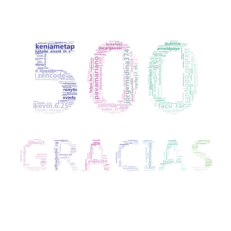

In [54]:
image_colors = ImageColorGenerator(mask)
plt.figure()
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

Si queremos guardar nuestro word cloud en una imagen lo podemos hacer con la siguiente línea

In [53]:
wc.to_file('gracias.png')